# Fase 1: Importación del dataset.

In [7]:
#Importar dataset
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [8]:
import pandas as pd

In [9]:
#Asignar datos al dataframe
import io
df_houseprice= pd.read_csv(io.BytesIO(uploaded['data.csv']))

# Fase 2: Análisis exploratorio de los datos.

## 2.1 Exploración de datos

In [10]:
# Explorando las primeras filas
df_houseprice.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [11]:
#Usando la funcion shape para ver el numero de filas en el dataframe
num_filas = df_houseprice.shape[0]
num_filas

4600

In [12]:
#Usando la funcion data type
df_houseprice.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [13]:
#Buscando los valores nulos
df_houseprice.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [14]:
#Usando la funcion describe
estadisticas_descriptivas = df_houseprice.describe()
print(estadisticas_descriptivas)

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

In [15]:
#Usando la funcion info
df_houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**Conclusiones**

El dataframe contiene 18 columnas y 4600 filas. Dentro de los tipos de datos que tenemos se encuentran los objetos (pueden ser string o combinación de caracteres), números enteros o flotantes y  el dataframe no cuenta con valores nulos.

La función .describe nos provee ciertas medidas que nos ayudan con uno de los análisis más simples del dataframe al poder identificar: la cantidad de registros, la media, desviación estándar, el valor mínimo y máximo y los percentiles de cada una de las columnas.

Las columnas que considero más relevantes para realizar las fases restantes del proyecto son: el precio, cantidad de habitaciones, cantidad de baños, si cuenta con una ubicación frente al agua o vista, las condiciones, los años de construcción y renovación y la ubicación.  


## 2.2 Análisis visual de los datos.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set(style="whitegrid")

In [21]:
# Seleccionar algunas variables para el pairplot
selected_columns = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']

In [22]:
# Crear un DataFrame con las columnas seleccionadas
selected_df = df_houseprice[selected_columns]


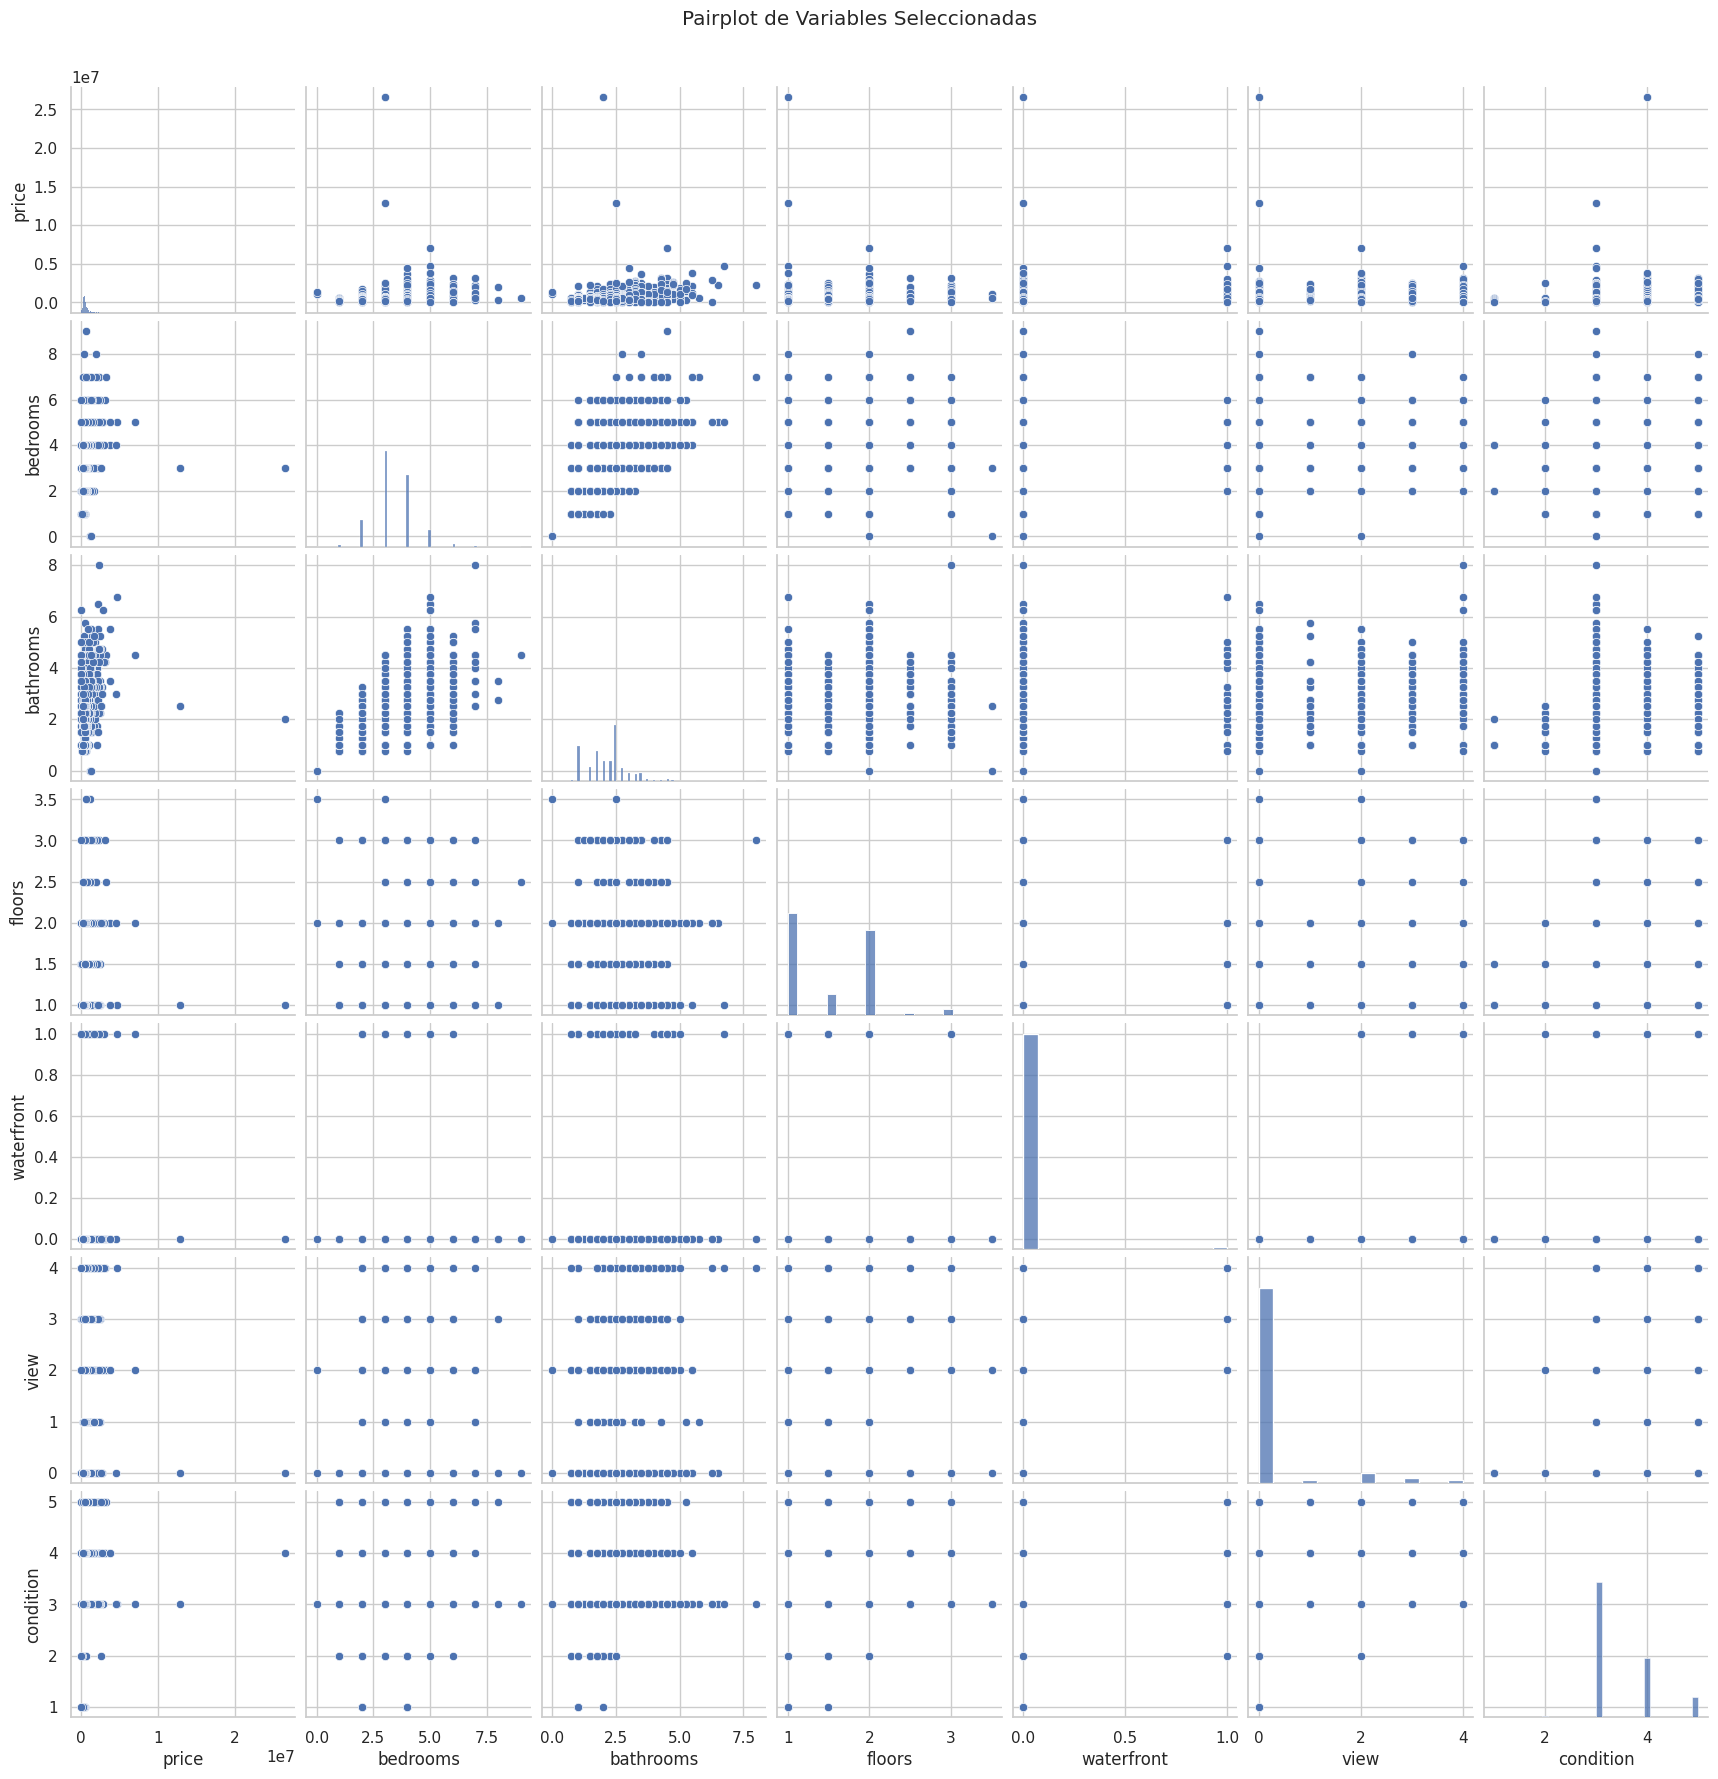

In [23]:
# Pairplot
sns.pairplot(selected_df)
plt.suptitle('Pairplot de Variables Seleccionadas', y=1.02)
plt.show()

En esta primera visualización podemos ver las relaciones entre todas las variables numéricas del dataframe. Se pueden identificar correlaciones lineales entre algunas de las variables que se relacionan con la variable precio.

De igual manera, se representan histogramas o gráficos de densidad para cada variable. Esto te da una idea de la distribución de cada variable por separado.

Existen otras relaciones más complejas entre variables que nos pueden ayudar a identificar outliers en los gráficos.

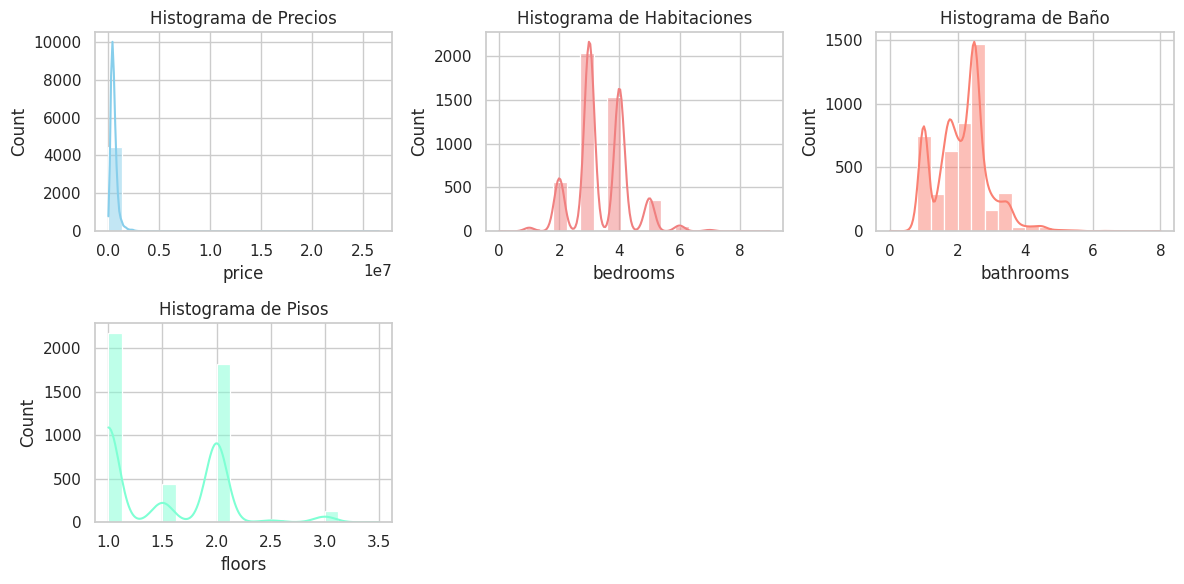

In [24]:
# Histograma
plt.figure(figsize=(12,6))
plt.subplot(2, 3, 1)
sns.histplot(df_houseprice['price'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de Precios')

plt.subplot(2, 3, 2)
sns.histplot(df_houseprice['bedrooms'], bins=20, kde=True, color='lightcoral')
plt.title('Histograma de Habitaciones')

plt.subplot(2, 3, 3)
sns.histplot(df_houseprice['bathrooms'], bins=20, kde=True, color='salmon')
plt.title('Histograma de Baño')

plt.subplot(2, 3, 4)
sns.histplot(df_houseprice['floors'], bins=20, kde=True, color='aquamarine')
plt.title('Histograma de Pisos')

plt.tight_layout()
plt.show()

En este apartado podemos ver la distribución para algunas de las variables seleccionadas. Con los precios se puede ver que van en un rango desde los 2000 hasta los 10000. En cuanto a las habitaciones la predominan las casas con 2-3 habitaciones, para los baños se observan mayor diversidad pero la mayor parte está distribuida en casa con 3 baños. La casas más vendidas han sido con 1 piso seguidas por las de 2 pisos.

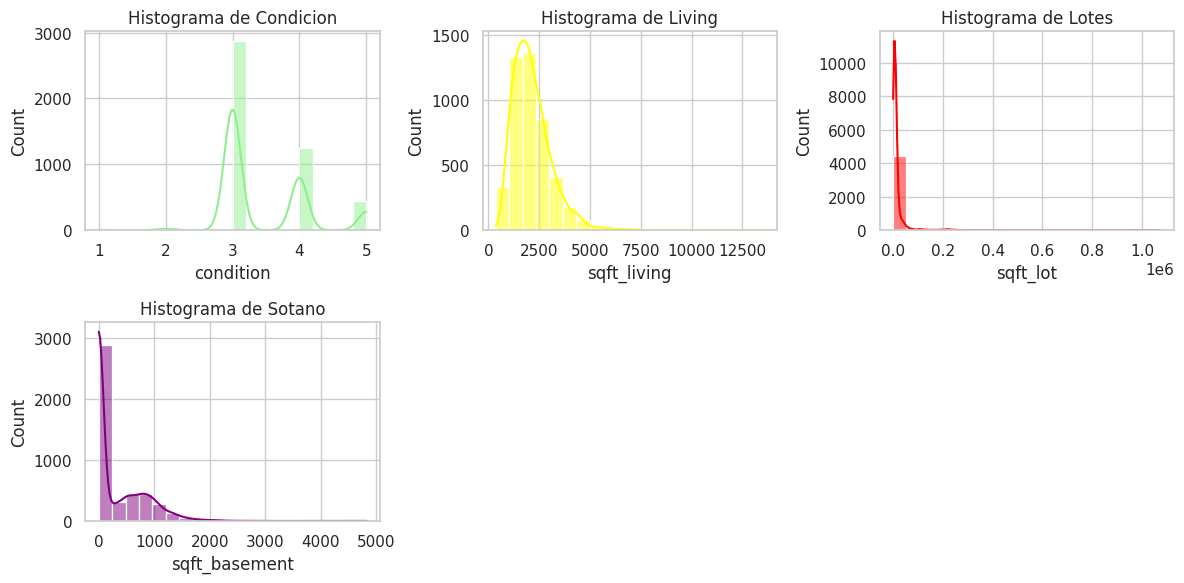

In [26]:
# Histograma
plt.figure(figsize=(12,6))
plt.subplot(2, 3, 1)
sns.histplot(df_houseprice['condition'], bins=20, kde=True, color='lightgreen')
plt.title('Histograma de Condicion')

plt.subplot(2, 3, 2)
sns.histplot(df_houseprice['sqft_living'], bins=20, kde=True, color='yellow')
plt.title('Histograma de Living')

plt.subplot(2, 3, 3)
sns.histplot(df_houseprice['sqft_lot'], bins=20, kde=True, color='red')
plt.title('Histograma de Lotes')

plt.subplot(2, 3, 4)
sns.histplot(df_houseprice['sqft_basement'], bins=20, kde=True, color='purple')
plt.title('Histograma de Sotano')

plt.tight_layout()
plt.show()

Las condiciones de las casas se distribuyen del 1-5 siendo 1 muy malas condiciones y 5 muy buenas condiciones, según el rango gran parte de las casas de dataframe son consideradas en condiciones medias con una calificación de 3. En las demás graficas podemos ver el rango de pies cuadrados del área de estar, el lote de la casa en sí y su sótano.

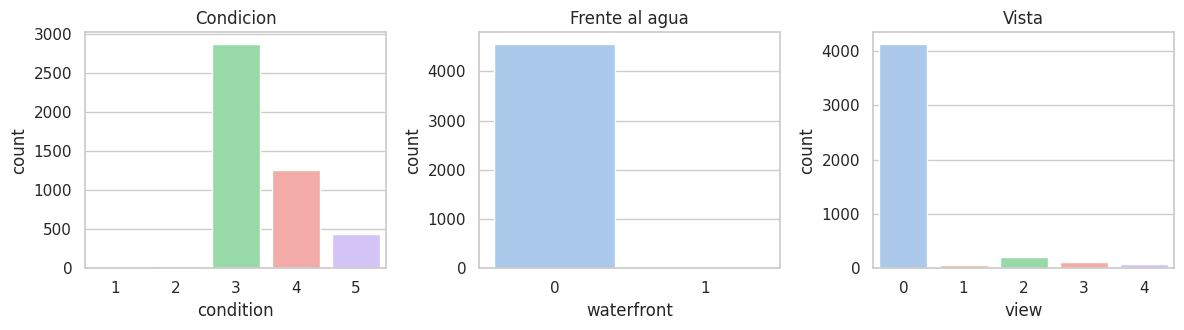

In [27]:
# Diagrama de Barras
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 4)
sns.countplot(x='condition', data=df_houseprice, palette='pastel')
plt.title('Condicion')

plt.subplot(2, 3, 5)
sns.countplot(x='waterfront', data=df_houseprice, palette='pastel')
plt.title('Frente al agua')

plt.subplot(2, 3, 6)
sns.countplot(x='view', data=df_houseprice, palette='pastel')
plt.title('Vista')

plt.tight_layout()
plt.show()

Como fue explicado anteriormente la mayor parte de los que han comprado viviendas la han calificado como ni en muy buenas condiciones ni mala, visualizamos que ninguna de las casa listadas posee vista o frente al agua y a pesar de que predominan las casas sin vistas son seguidas por casa que tienen al menos 2 vistas.

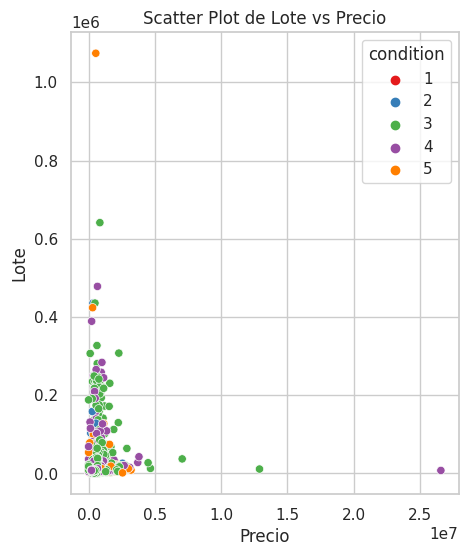

In [33]:
# Scatter Plot
plt.figure(figsize=(5, 6))
sns.scatterplot(x='price', y='sqft_lot', data=df_houseprice, hue='condition', palette='Set1')
plt.title('Scatter Plot de Lote vs Precio')
plt.xlabel('Precio')
plt.ylabel('Lote')
plt.show()

Con esta relación entre los pies cuadrados del lote y el precio teniendo como factor las condiciones de la casa, se visualiza que la mayoría de casas se encuentran dentro del rango medio de precios. Se tienen algunos resultados aislados que por los pies cuadrados del lote la condición de la casa es muy alta pero el precio no se inmuto, en comparación de una vivienda que posee menos pies cuadrados y fue vendida a mayor precio cuando su condición es media alta.

<ipython-input-36-75b68819bac2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_houseprice.corr()


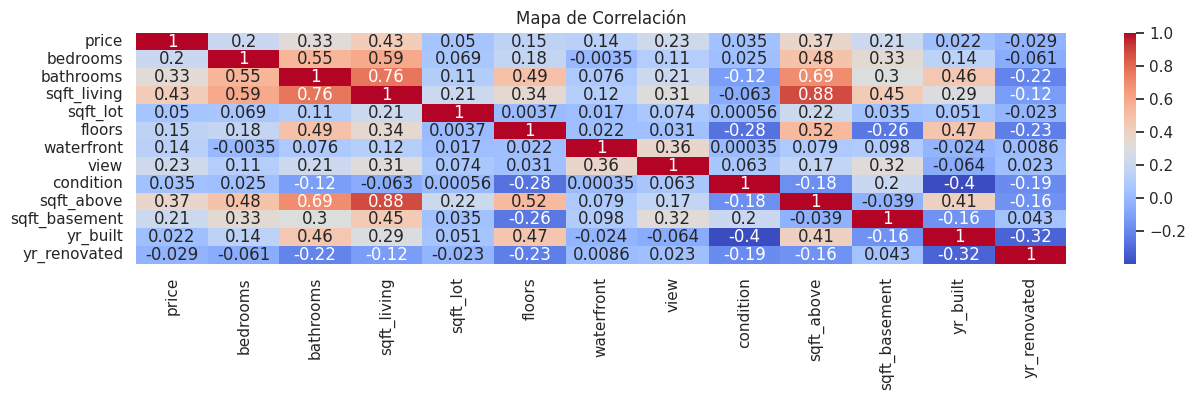

In [36]:
# Mapa de Correlación
plt.figure(figsize=(15, 3))
correlation_matrix = df_houseprice.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlación')
plt.show()

Dentro de los datos del dataframe existen algunas variables fuertemente correladas como lo son:
•	Pies cuadrados del área de estar y Pies cuadrados de arriba
•	Pies cuadrados del área de estar y cantidad de baños
•	Pies cuadrados de arriba y cantidad de baños
•	Cantidad de baños y cantidad de habitaciones


# Fase 3: Fase de entrenamiento.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

## 3.1 Escenario 1

Predicción del Precio en función de Características Básicas: se usaran las variables como el número de habitaciones (bedrooms), el número de baños (bathrooms), la cantidad de pies cuadrados de la sala de estar (sqft_living), y el tamaño del lote (sqft_lot).

In [38]:
# Seleccionar características y variable objetivo
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
target = 'price'

In [39]:
# Crear conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_houseprice[features], df_houseprice[target], test_size=0.2, random_state=42)

In [40]:
# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predicciones en el conjunto de prueba
prediccion_entrenamiento = model.predict(X_train)

# Evaluación del modelo
mse_train = mean_squared_error(y_true= y_train, y_pred= prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN:' +  str(mse_train))

Error Cuadrático Medio (MSE) HIPO 1 TRAIN:73979164596.06038


In [42]:
# Predicciones en el conjunto de prueba
prediccion_entrenamiento = model.predict(X_test)

# Evaluación del modelo
mse_test = mean_squared_error(y_true= y_test, y_pred= prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST:' +  str(mse_test))

Error Cuadrático Medio (MSE) HIPO 1 TEST:989695229228.5095


##3.2 Escenario 2
Predicion del precio basado en caracteristicas cuyo nivel de correlacion es cercano al 0 : Sqft_lot, waterfront, condition, bedrooms, view, floors  

In [58]:
# Seleccionar características y variable objetivo
features2 = ['condition', 'waterfront', 'bedrooms', 'sqft_lot', 'floors', 'view']
target2 = 'price'

In [59]:
# Crear conjunto de datos de entrenamiento y prueba
X_hipo2_train, X_hipo2_test, y_hipo2_train, y_hipo2_test = train_test_split(df_houseprice[features2], df_houseprice[target2], test_size=0.2, random_state=43)

In [60]:
# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_hipo2_train, y_hipo2_train)

LinearRegression()

In [61]:
# Predicciones en el conjunto de prueba
prediccion_entrenamiento = model.predict(X_hipo2_train)

# Evaluación del modelo
mse_hipo2_train = mean_squared_error(y_true= y_hipo2_train, y_pred= prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN:' +  str(mse_hipo2_train))

Error Cuadrático Medio (MSE) HIPO 2 TRAIN:325848729855.08545


In [62]:
# Predicciones en el conjunto de prueba
prediccion_entrenamiento = model.predict(X_hipo2_test)

# Evaluación del modelo
mse_hipo2_test = mean_squared_error(y_true= y_hipo2_test, y_pred= prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 2 TEST:' +  str(mse_hipo2_test))

Error Cuadrático Medio (MSE) HIPO 2 TEST:122064002798.64699


##3.3 Escenario 3

Utilizar los mecanismos que ofrece ScikitLearn para normalizar a traves de distintos scalers.

In [80]:
df_numeric = df_houseprice.select_dtypes(include='number')


In [81]:
(df_numeric)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.011771,3.0,1.50,1340,7912,1.5,0,0,0.6,1340,0,1955,2005
1,0.089658,5.0,2.50,3650,9050,2.0,0,4,1.0,3370,280,1921,0
2,0.012862,3.0,2.00,1930,11947,1.0,0,0,0.8,1930,0,1966,0
3,0.015795,3.0,2.25,2000,8030,1.0,0,0,0.8,1000,1000,1963,0
4,0.020684,4.0,2.50,1940,10500,1.0,0,0,0.8,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.011590,3.0,1.75,1510,6360,1.0,0,0,0.8,1510,0,1954,1979
4596,0.020095,3.0,2.50,1460,7573,2.0,0,0,0.6,1460,0,1983,2009
4597,0.015679,3.0,2.50,3010,7014,2.0,0,0,0.6,3010,0,2009,0
4598,0.007649,4.0,2.00,2090,6630,1.0,0,0,0.6,1070,1020,1974,0


In [82]:
#Scaling data
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df_numeric[["condition", "price"]] = scaler.fit_transform(df_numeric[["condition", "price"]])

In [83]:
# Dividir el conjunto de datos
X_hipo3 = df_numeric.drop('price', axis=1)
y_hipo3 = df_numeric['price']

In [84]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_hipo3_train, X_hipo3_test, y_hipo3_train, y_hipo3_test = train_test_split(X_hipo3, y_hipo3, test_size=0.2, random_state=43)

In [85]:
# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_hipo3_train, y_hipo3_train)

LinearRegression()

In [86]:
# Predicciones en el conjunto de prueba
prediccion_entrenamiento = model.predict(X_hipo3_train)

# Evaluación del modelo
mse_hipo3_train = mean_squared_error(y_true= y_hipo3_train, y_pred= prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 3 TRAIN:' +  str(mse_hipo3_train))

Error Cuadrático Medio (MSE) HIPO 3 TRAIN:0.00041361912233511914


In [87]:
# Predicciones en el conjunto de prueba
prediccion_entrenamiento = model.predict(X_hipo3_test)

# Evaluación del modelo
mse_hipo3_test = mean_squared_error(y_true= y_hipo3_test, y_pred= prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 3 TEST:' +  str(mse_hipo3_test))

Error Cuadrático Medio (MSE) HIPO 3 TEST:0.00010584337514567154


#Fase 4: Evaluación y análisis de los resultados.

El mejor de los modelos entrenados ha sido el "Escenario 3" debido a los resultados del MSE para los datos de entrenamiento y test respectivamente.

Error Cuadrático Medio (MSE) HIPO 3 TRAIN:0.00041361912233511914
Error Cuadrático Medio (MSE) HIPO 3 TEST:0.00010584337514567154

En este ultimo escenario, la operación de escala se realiza específicamente en las columnas "price" y "condition" lo cual acorta mas los valores dentro del rango y permitio que el modelo pasara la prueba de la metrica de evaluacion.

Este Escenario #3 se diferencia debido a que MaxAbsScaler escala cada característica dividiendo cada valor de la característica por el valor absoluto máximo en esa misma característica asegurando que los valores de cada característica estén en el rango [-1, 1]. A diferencia del primer escenario donde las variables que se escogieron como parte de los datos del modelo, estas presentaban alta correlacion entre ellas, arrojando unos resultados muy por encima de lo esperado por la metrica.

Error Cuadrático Medio (MSE) HIPO 1 TRAIN:73979164596.06038
Error Cuadrático Medio (MSE) HIPO 1 TEST:989695229228.5095

Y en el segundo escenario se trataron de escoger otras variables que su nivel de correlacion fuera cercano a 0 pero al no poseer un rango comun, se obtuvo el siguiente resultado:

Error Cuadrático Medio (MSE) HIPO 2 TRAIN:325848729855.08545
Error Cuadrático Medio (MSE) HIPO 2 TEST:122064002798.64699

